# California House Price Prediction


### 1. Problem Statement and Objectives

#### Problem Statement

This project focuses on constructing a robust model to predict median house values across various districts in California. Utilizing a dataset provided, the goal is to develop a predictive model capable of estimating median housing prices for any district based on its comprehensive metrics.

#### Objectives:

- **Model Development**: Create a machine learning model that effectively learns from the dataset to predict median house prices.
  
- **Accuracy and Generalization**: Ensure the model can generalize well to predict housing prices accurately across diverse district characteristics.
  
- **Insight Generation**: Gain insights into factors influencing housing prices in California districts through model interpretation and analysis.

#### Domain: Finance and Housing

This project sits within the domain of finance and housing, aiming to leverage data science to enhance predictive capabilities in real estate valuation.

### 2. Data Description

The California Census Data, sourced from the US Census Bureau, comprises comprehensive metrics for each block group in California. These metrics include population counts, median income levels, median housing prices, and other relevant indicators. This dataset serves as a pivotal input for defining project scope and delineating both functional and non-functional requirements essential for its implementation.

Field and Description

longitude (signed numeric - float) : Longitude value for the block in California, USA

latitude (numeric - float ) : Latitude value for the block in California, USA

housing_median_age (numeric - int ) : Median age of the house in the block

total_rooms (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block

total_bedrooms (numeric - float ) : Count of the total number of bedrooms in all houses in the block

population (numeric - int ) : Count of the total number of population in the block

households (numeric - int ) : Count of the total number of households in the block

median_income (numeric - float ) : Median of the total household income of all the houses in the block

ocean_proximity (numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]

median_house_value (numeric - int ) : Median of the household prices of all the houses in the block

### 3. Table of Contents

1. [Problem Statement and Objectives](#1.-Problem-Statement-and-Objectives)

2. [Data Description](#2.-Data-Description)

3. [Table of Contents](#3.-Table-of-Contents)

4. [Importation of Libraries and Packages](#4.-Importation-of-Libraries-and-Packages)

5. [Data Importation](5.-Data-Importation)

6. [Data Cleaning and Validation](#6.-Data-Cleaning-and-Validation)

7. [Exploratory Data Analysis](#7.-Exploratory-Data-Analysis)

8. [Data Preprocessing](#8.-Data-Preprocessing)

9. [Feature Engineering](#9.-Feature-Engineering)

10. [Model Building](#10.-Model-Building)

11. [Model Validation](#11.-Model-Validation)

12. [Model Comparison and Selection](#10.-Model-Comparison-and-Selection)

13. [Summary](#12.-Summary)

### 4. Importation of Libraries and Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge, Lasso
from sklearn.svm import SVR
import xgboost as xgb

### 5. Data Importation

In [3]:
# Importing the data
data = pd.read_csv("/kaggle/input/house-price/1553768847-housing.csv")

# Printing the first 5 rows of the dataset
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


### 6. Data Cleaning and Validation

In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
# Checking for duplicated data

data.duplicated().sum()

0

In [7]:
# Checking for missing values

data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [8]:
# Handling missing values by filling in missing values with the mean of the individual columns

mean_total_bedrooms = data['total_bedrooms'].mean()
data['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)


In [9]:
data['total_bedrooms'].isnull().sum()

0

In [10]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


### 7. Exploratory Data Analysis

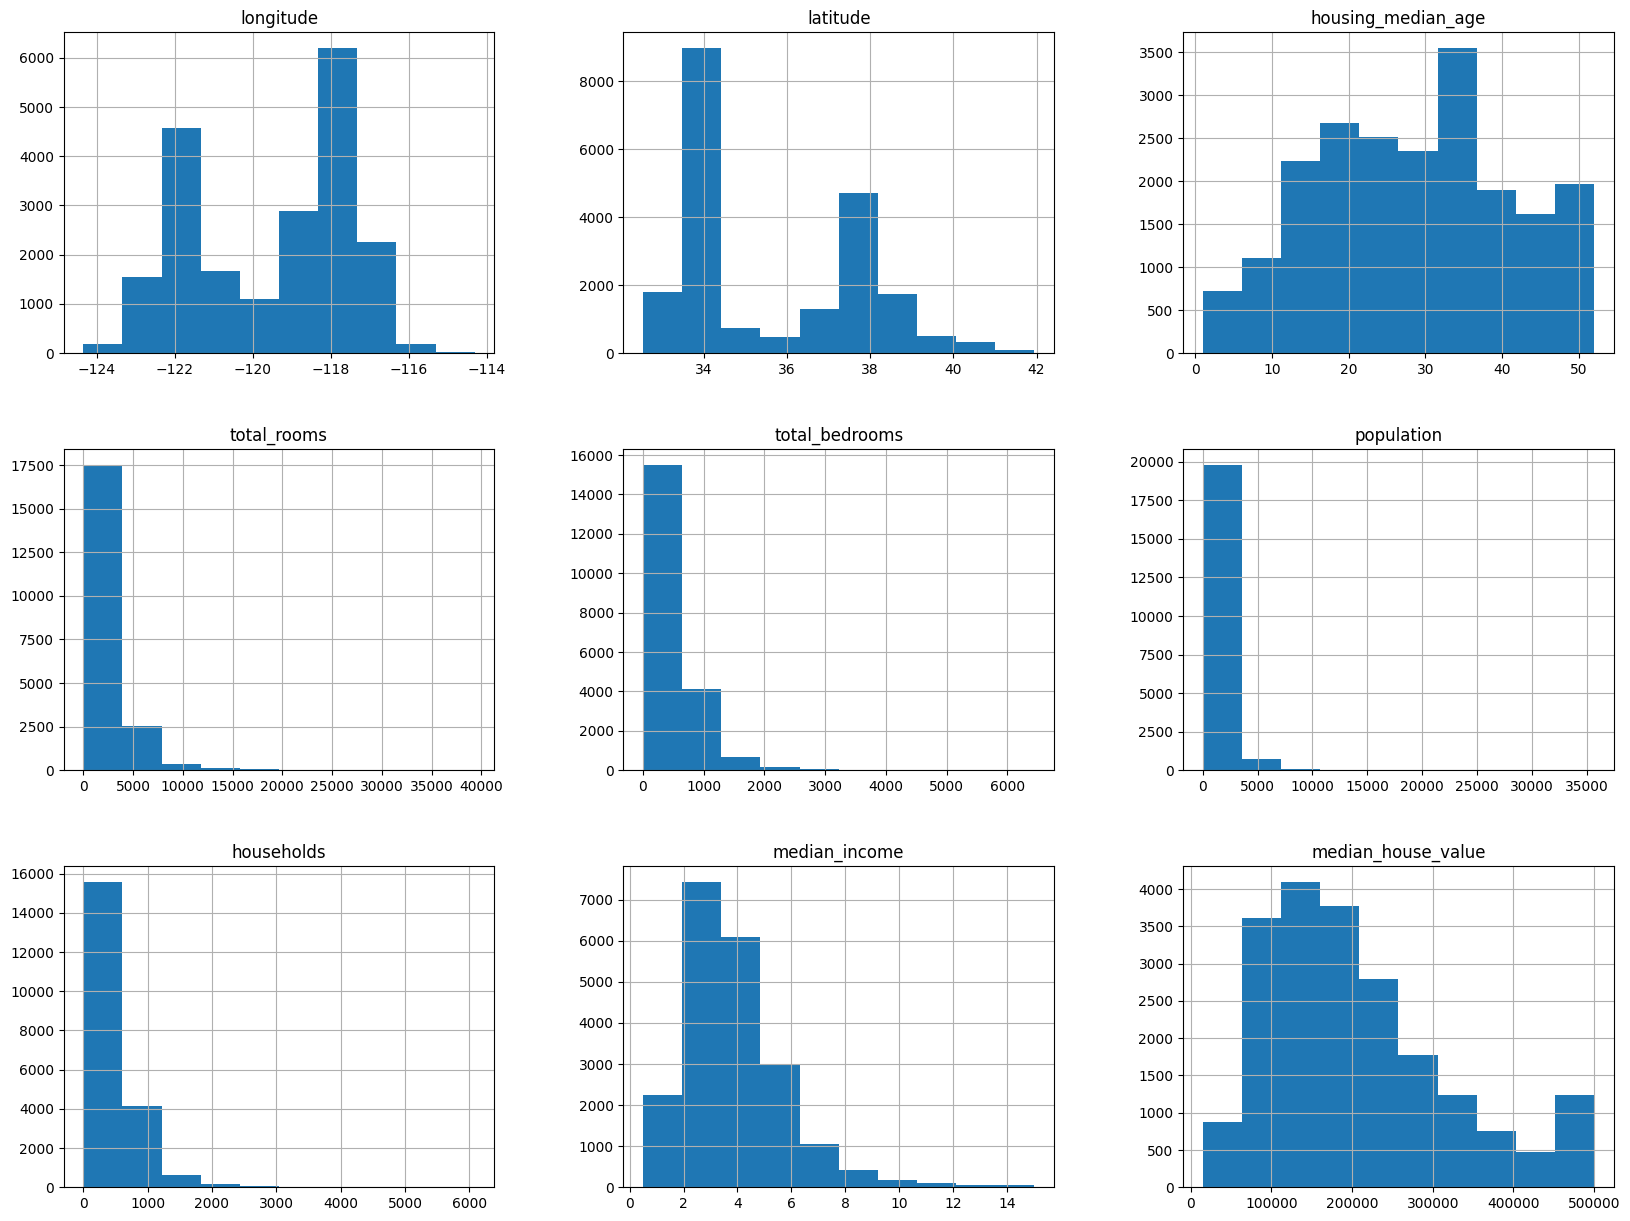

In [11]:
data.hist(figsize=(20,15))
plt.show()

total_rooms, total_bedrooms, population, and households are right skewed.

In [12]:
data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


<Axes: >

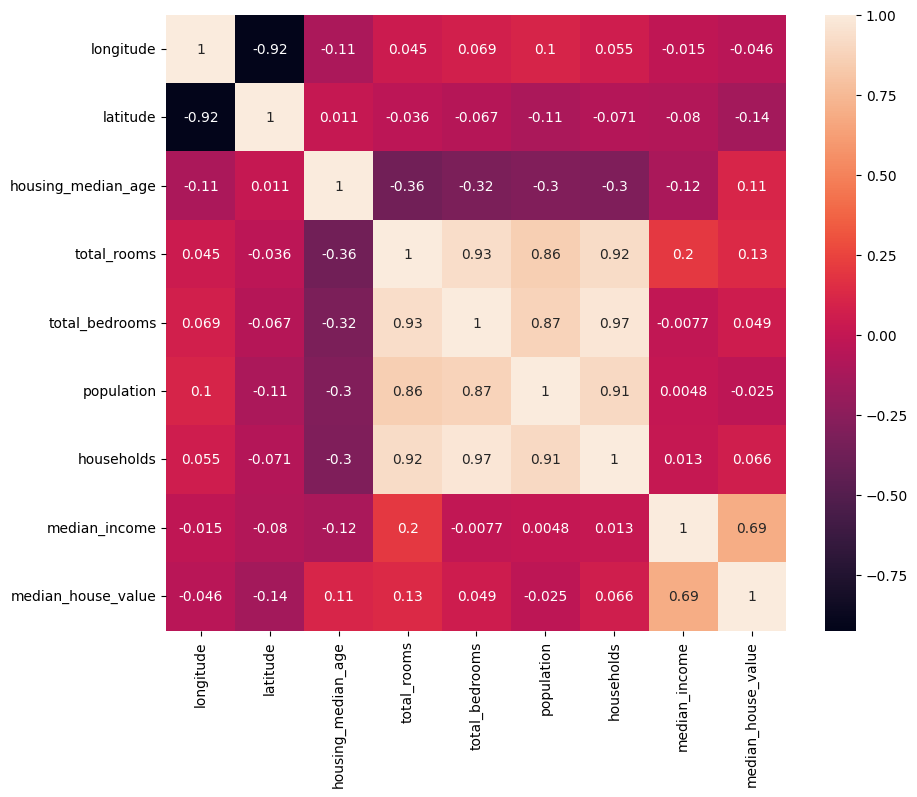

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True)

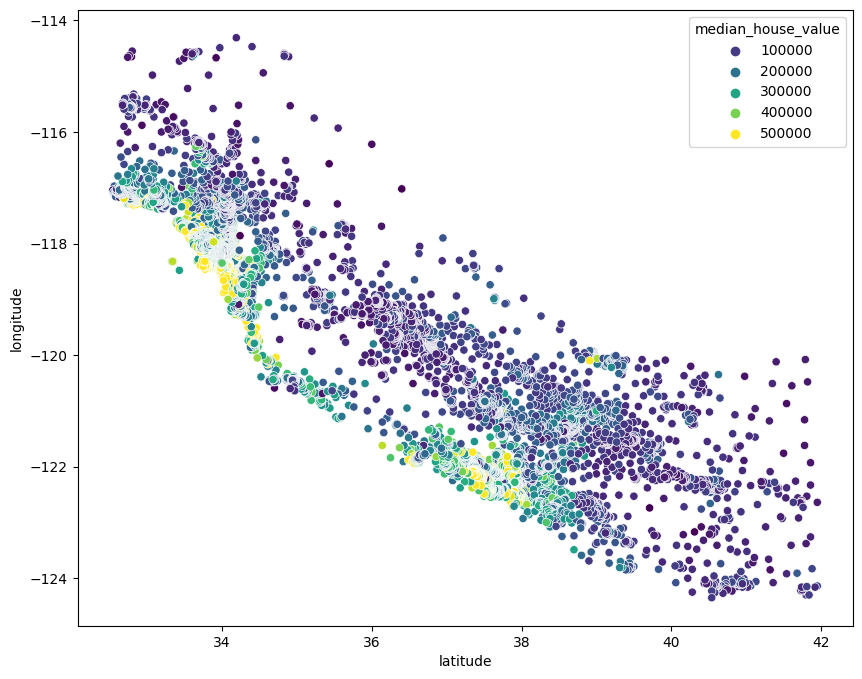

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='latitude', y='longitude', data=data, hue='median_house_value', palette = 'viridis')
plt.show()

The closer the house is to the coast, the more expensive the house is.

### 8. Data Preprocessing

In [15]:
# Taking the logarithm of skewed data to analyse the distribution and make it normally distributed

data['total_rooms'] = np.log(data['total_rooms'] + 1 )
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1 )
data['population'] = np.log(data['population'] + 1 )
data['households'] = np.log(data['households'] + 1 )

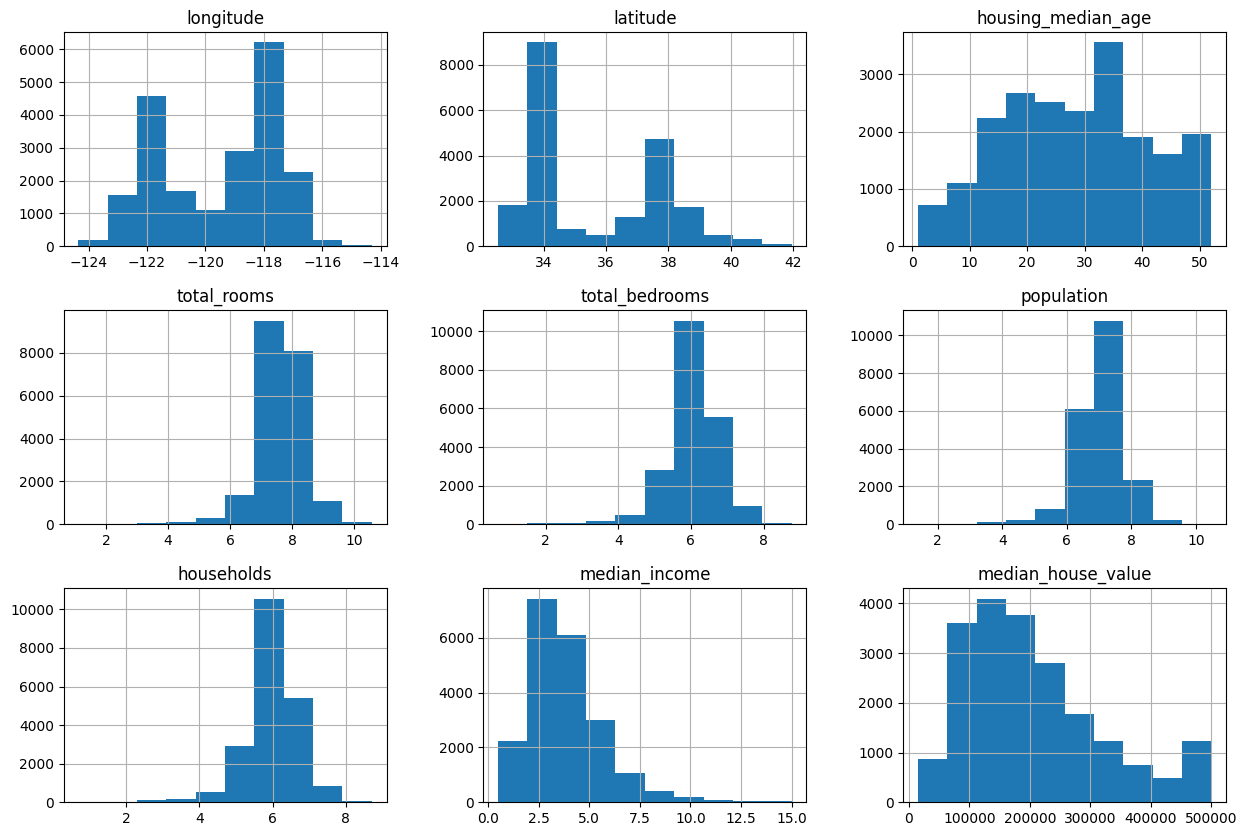

In [16]:
data.hist(figsize=(15,10))
plt.show()

In [17]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [18]:
# Converting "ocean_proximity" from categorical data to numerical data

data = data.join(pd.get_dummies(data['ocean_proximity']))
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,6.781058,4.867534,5.777652,4.844187,8.3252,NEAR BAY,452600,False,False,False,True,False
1,-122.22,37.86,21,8.867850,7.009409,7.784057,7.037906,8.3014,NEAR BAY,358500,False,False,False,True,False
2,-122.24,37.85,52,7.291656,5.252273,6.208590,5.181784,7.2574,NEAR BAY,352100,False,False,False,True,False
3,-122.25,37.85,52,7.150701,5.463832,6.326149,5.393628,5.6431,NEAR BAY,341300,False,False,False,True,False
4,-122.25,37.85,52,7.395108,5.638355,6.338594,5.560682,3.8462,NEAR BAY,342200,False,False,False,True,False


In [19]:
data = data.drop( 'ocean_proximity', axis = 1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,6.781058,4.867534,5.777652,4.844187,8.3252,452600,False,False,False,True,False
1,-122.22,37.86,21,8.867850,7.009409,7.784057,7.037906,8.3014,358500,False,False,False,True,False
2,-122.24,37.85,52,7.291656,5.252273,6.208590,5.181784,7.2574,352100,False,False,False,True,False
3,-122.25,37.85,52,7.150701,5.463832,6.326149,5.393628,5.6431,341300,False,False,False,True,False
4,-122.25,37.85,52,7.395108,5.638355,6.338594,5.560682,3.8462,342200,False,False,False,True,False


<Axes: >

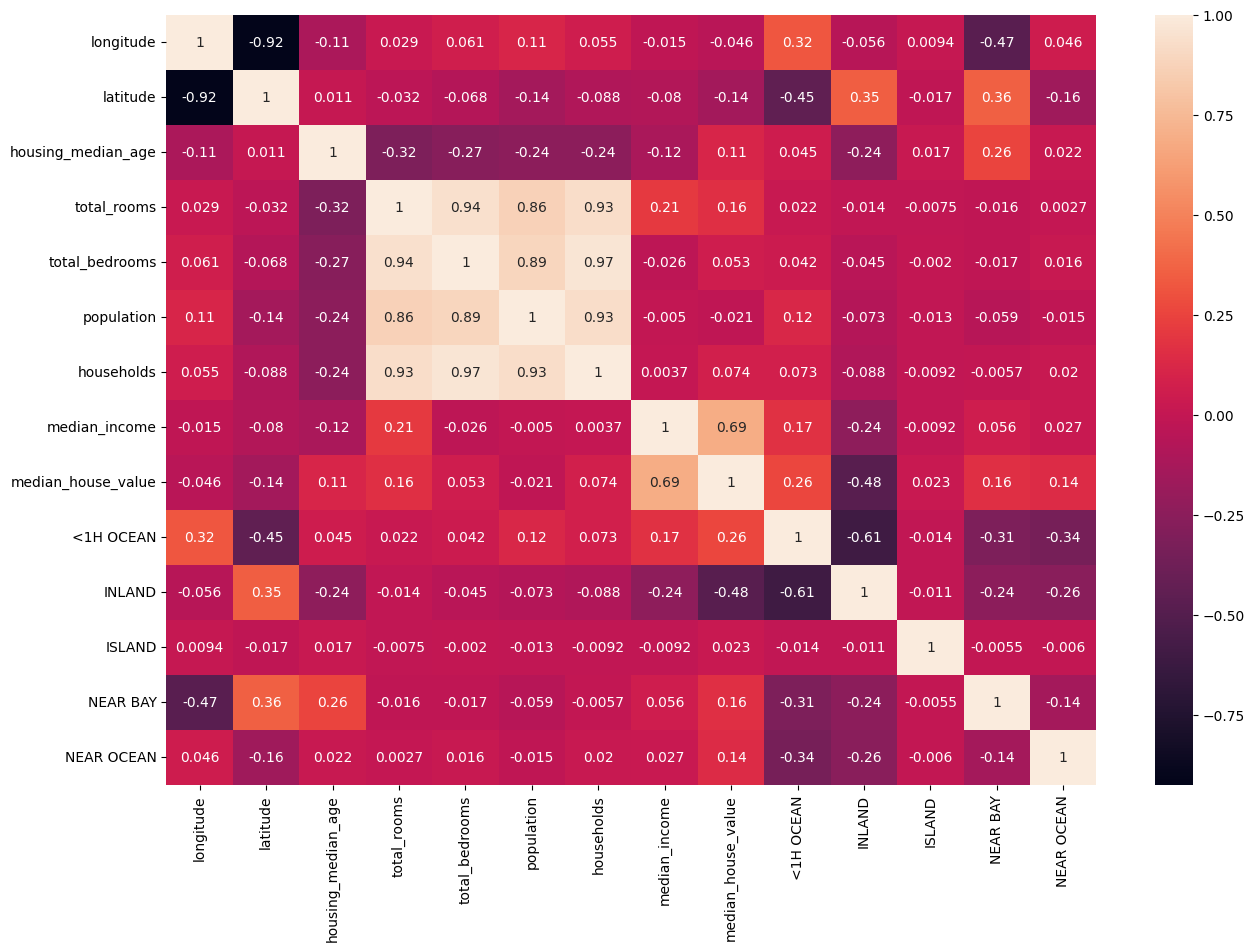

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

Houses that are in-land are the least costly and house that are less than 1 hour away from the ocean are the most costly.

### 9. Feature Engineering

In [21]:
# Adding the ratio of total_bedrooms to total_rooms
data['bedrooms_ratio'] = data['total_bedrooms'] / data['total_rooms']

In [22]:
# Adding the number of rooms per household
data['rooms_per_household'] = data['total_rooms'] / data['households']

<Axes: >

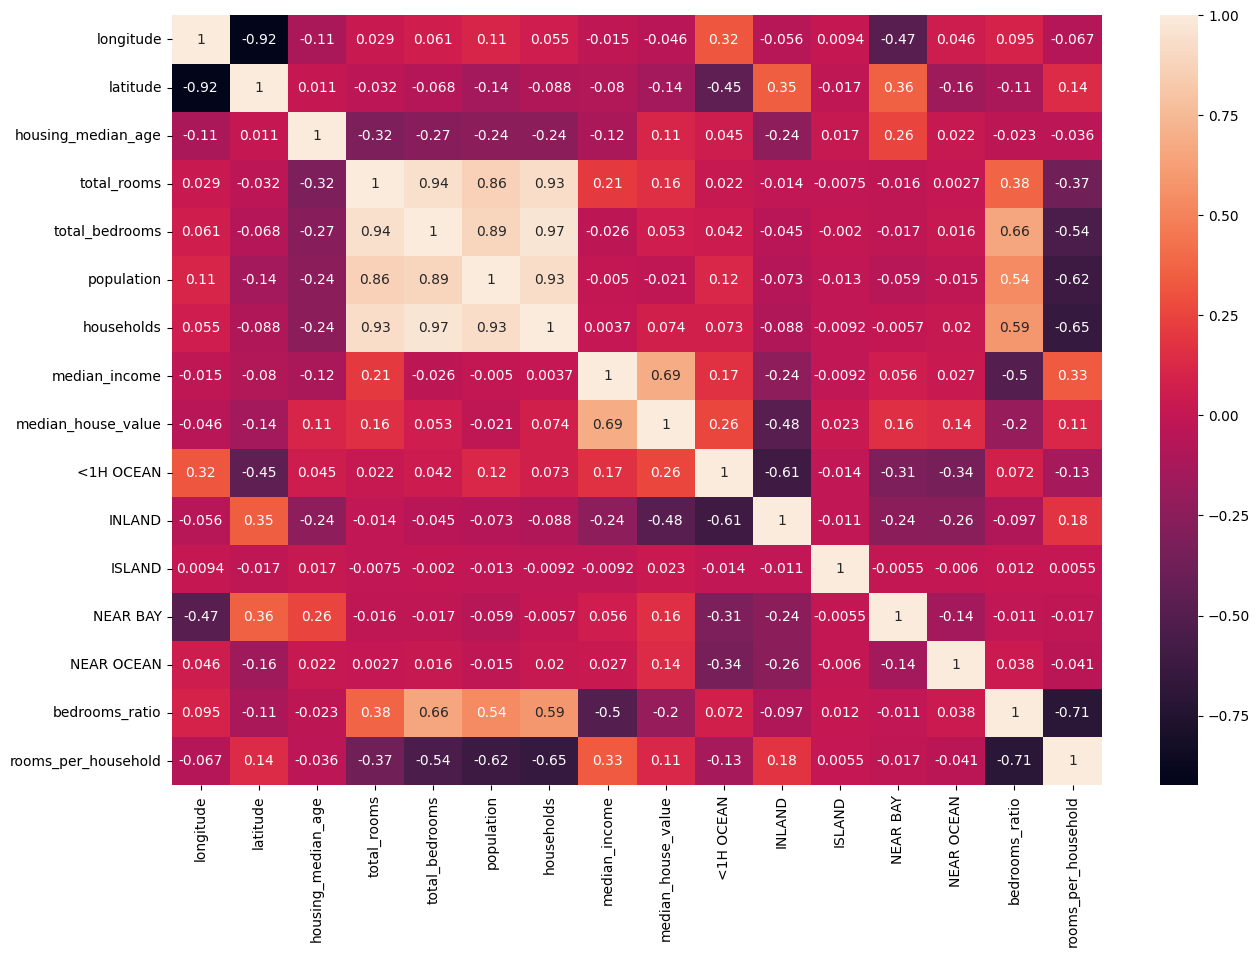

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

### 10. Model Building

In [24]:
# Extracting input data (X) and output data (y)
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [25]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,rooms_per_household
14196,-117.03,32.71,33,8.047829,6.442540,7.741099,6.436150,3.2596,False,False,False,False,True,0.800531,1.250410
8267,-118.16,33.77,49,8.126518,6.669498,7.181592,6.629363,3.8125,False,False,False,False,True,0.820708,1.225837
17445,-120.48,34.66,4,7.548556,5.805135,6.820016,5.820083,4.1563,False,False,False,False,True,0.769039,1.296984
14265,-117.11,32.69,36,7.259820,5.908083,7.257708,5.874931,1.9425,False,False,False,False,True,0.813806,1.235729
2271,-119.80,36.78,43,7.776115,6.068426,6.774224,5.942799,3.5542,False,True,False,False,False,0.780393,1.308494


In [27]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,rooms_per_household
20046,-119.01,36.06,25,7.317212,6.289475,7.239215,5.886104,1.6812,False,True,False,False,False,0.859545,1.243133
3024,-119.46,35.14,30,7.987524,6.289475,7.356280,6.371612,2.5313,False,True,False,False,False,0.787412,1.253611
15663,-122.44,37.80,52,8.250881,6.289475,7.178545,6.871091,3.4801,False,False,False,True,False,0.762279,1.200811
20484,-118.72,34.28,17,8.023552,6.289475,7.441907,6.206576,5.7376,True,False,False,False,False,0.783877,1.292750
9814,-121.93,36.62,34,7.763021,6.289475,6.969791,6.061457,3.7250,False,False,False,False,True,0.810184,1.280719


In [28]:
# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Functions to evaluate models and print metrics
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mape = (abs((y_test - predictions) / y_test).mean()) * 100
    return mse, rmse, mae, r2, mape

def print_evaluation(model_name, metrics):
    mse, rmse, mae, r2, mape = metrics
    print(f'{model_name} Evaluation:')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}')
    print(f'Mean Absolute Percentage Error: {mape}')

# List to keep metrics
results = []


#### Linear Regression

Linear Regressor Evaluation:
Mean Squared Error: 4786071909.557724
Root Mean Squared Error: 69181.44194477102
Mean Absolute Error: 49751.76826996144
R-squared: 0.6347650245816712
Mean Absolute Percentage Error: 29.572061490008412


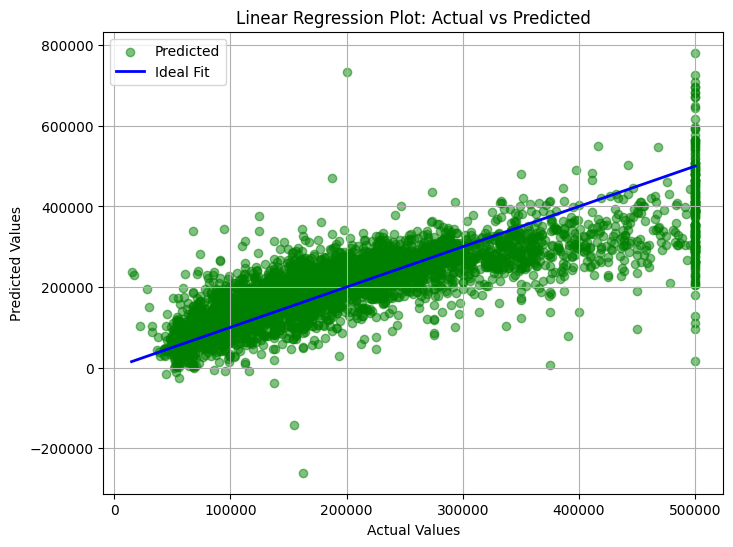

In [30]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_metrics = evaluate_model(lr, X_test_scaled, y_test)
print_evaluation('Linear Regressor', lr_metrics)

results.append(('Linear Regressor', *lr_metrics))


linear_predictions = lr.predict(X_test_scaled)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_predictions, color='green', alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='-', linewidth=2, label='Ideal Fit') 
plt.title('Linear Regression Plot: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

#### Bayesian Ridge

Bayesian Regressor Evaluation:
Mean Squared Error: 4784483926.816553
Root Mean Squared Error: 69169.96405099942
Mean Absolute Error: 49734.65937195814
R-squared: 0.6348862068055066
Mean Absolute Percentage Error: 29.553428412461695


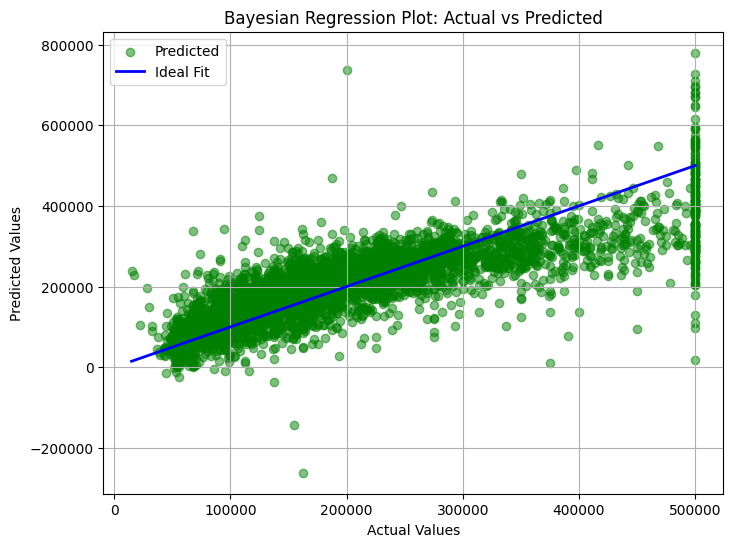

In [31]:
br = BayesianRidge()
br.fit(X_train_scaled, y_train)
br_metrics = evaluate_model(br, X_test_scaled, y_test)
print_evaluation('Bayesian Regressor', br_metrics)

results.append(('Bayesian Regressor', *br_metrics))

bayesian_predictions = br.predict(X_test_scaled)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, bayesian_predictions, color='green', alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='-', linewidth=2, label='Ideal Fit') 
plt.title('Bayesian Regression Plot: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

#### Random Forest

Best parameters for Random Forest Regressor: {'max_depth': None, 'n_estimators': 200}
Random Forest Regressor Evaluation:
Mean Squared Error: 2515661653.556559
Root Mean Squared Error: 50156.37201349953
Mean Absolute Error: 32490.31932170543
R-squared: 0.8080246934103277
Mean Absolute Percentage Error: 18.4154106651258


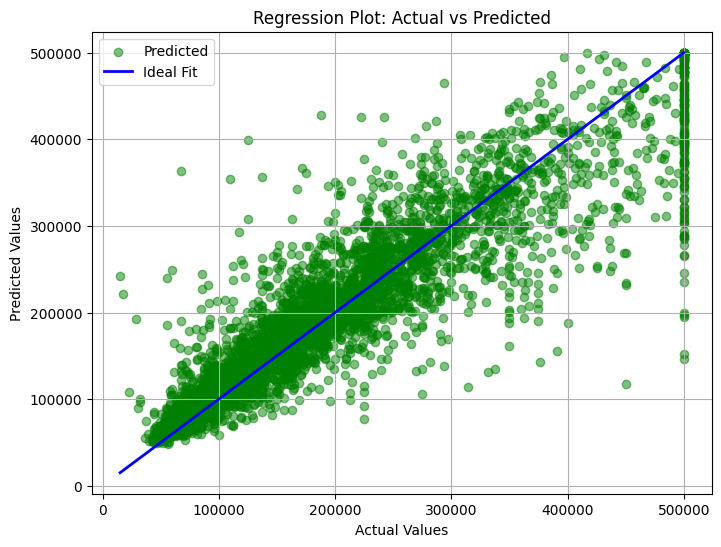

In [32]:
rf = RandomForestRegressor()
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2')
rf_grid.fit(X_train_scaled, y_train)
rf_best = rf_grid.best_estimator_
print("Best parameters for Random Forest Regressor:", rf_grid.best_params_)

rf_metrics = evaluate_model(rf_best, X_test_scaled, y_test)
print_evaluation('Random Forest Regressor', rf_metrics)

results.append(('Random Forest Regressor', *rf_metrics))

predicted_values = rf_grid.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_values, color='green', alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='-', linewidth=2,  label='Ideal Fit') 
plt.title('Regression Plot: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()


#### XGBoost Regressor

Best parameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 200}
XGBoost Regressor Evaluation:
Mean Squared Error: 2239379539.6809325
Root Mean Squared Error: 47322.08300234609
Mean Absolute Error: 31409.238295444222
R-squared: 0.8291083488540282
Mean Absolute Percentage Error: 17.778853491557246


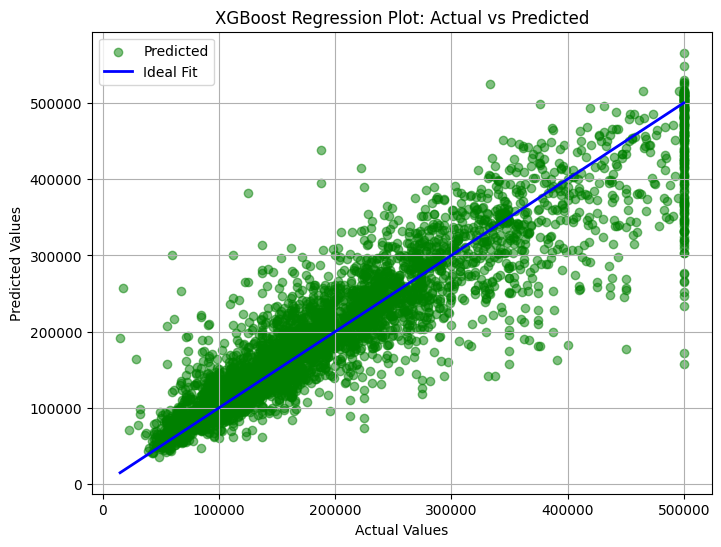

In [33]:
xgb_model = xgb.XGBRegressor()
xgb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='r2')
xgb_grid.fit(X_train_scaled, y_train)
xgb_best = xgb_grid.best_estimator_
print("Best parameters for XGBoost:", xgb_grid.best_params_)

xgb_metrics = evaluate_model(xgb_best, X_test_scaled, y_test)

print_evaluation('XGBoost Regressor', xgb_metrics)

results.append(('XGBoost Regressor', *xgb_metrics))

xgb_predictions = xgb_grid.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_predictions, color='green', alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='-', linewidth=2, label='Ideal Fit') 
plt.title('XGBoost Regression Plot: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

#### Lasso Regressor

Best parameters for Lasso Regressor: {'alpha': 10.0}
Lasso Regressor Evaluation:
Mean Squared Error: 4786240283.894626
Root Mean Squared Error: 69182.65883799657
Mean Absolute Error: 49736.08077216599
R-squared: 0.6347521755902725
Mean Absolute Percentage Error: 29.552537913877863


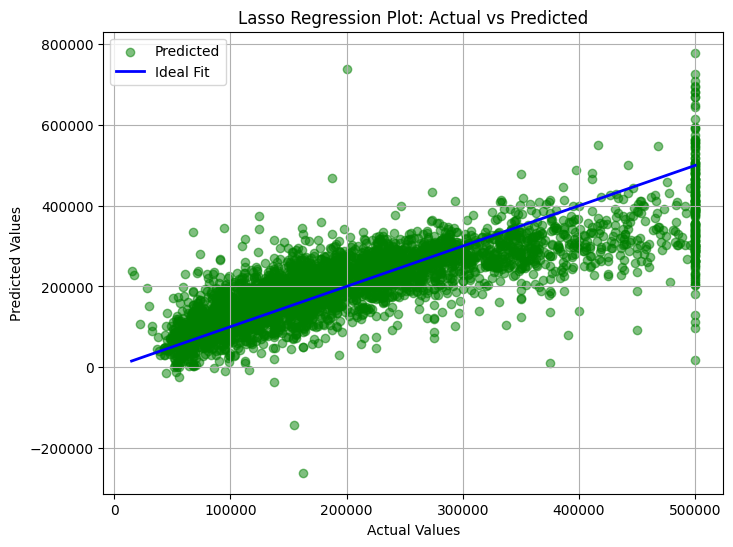

In [34]:
lasso = Lasso()
lasso_params = {'alpha': [0.1, 0.5, 1.0, 10.0]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_scaled, y_train)
lasso_best = lasso_grid.best_estimator_
print("Best parameters for Lasso Regressor:", lasso_grid.best_params_)

lasso_metrics = evaluate_model(lasso_best, X_test_scaled, y_test)
print_evaluation('Lasso Regressor', lasso_metrics)

results.append(('Lasso Regressor', *lasso_metrics))

lasso_predictions = lasso_grid.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_predictions, color='green', alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='-', linewidth=2, label='Ideal Fit') 
plt.title('Lasso Regression Plot: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

#### Decision Tree

Best parameters for Decision Tree Regressor: {'max_depth': 10, 'min_samples_split': 20}
Decision Tree Regressor Evaluation:
Mean Squared Error: 3961293308.541999
Root Mean Squared Error: 62938.806062253825
Mean Absolute Error: 41791.72519308939
R-squared: 0.6977055732737988
Mean Absolute Percentage Error: 23.428312889631012


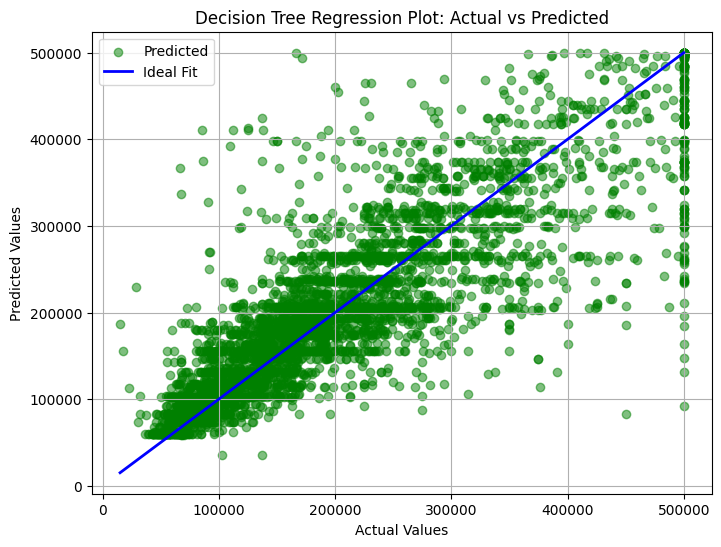

In [35]:
dt = DecisionTreeRegressor(random_state=42)
dt_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='r2')
dt_grid.fit(X_train_scaled, y_train)
dt_best = dt_grid.best_estimator_
print("Best parameters for Decision Tree Regressor:", dt_grid.best_params_)
dt_metrics = evaluate_model(dt_best, X_test_scaled, y_test)
print_evaluation('Decision Tree Regressor', dt_metrics)

results.append(('Decision Tree Regressor', *dt_metrics))

decision_tree_predictions = dt_grid.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, decision_tree_predictions, color='green', alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='-', linewidth=2, label='Ideal Fit') 
plt.title('Decision Tree Regression Plot: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

### 11. Model Validation

In [36]:
linear_predictions = lr.predict(X_test_scaled)
bayesian_predictions = br.predict(X_test_scaled)
rf_predictions = rf_grid.predict(X_test_scaled)
xgb_predictions = xgb_grid.predict(X_test_scaled)
lasso_predictions = lasso_grid.predict(X_test_scaled)
decision_tree_predictions = dt_grid.predict(X_test_scaled)

In [37]:
validation_df = pd.DataFrame({
    'True Values': y_test,
    'Linear Regression Predictions': linear_predictions,
    'Decision Tree Predictions': decision_tree_predictions,
    'Lasso Predictions': lasso_predictions,
    'XGBoost Predictions': xgb_predictions,
    'Random Forest Predictions': rf_predictions,
    'Bayesian Ridge Predictions': bayesian_predictions
})

validation_df.head(20)

,True Values,Linear Regression Predictions,Decision Tree Predictions,Lasso Predictions,XGBoost Predictions,Random Forest Predictions,Bayesian Ridge Predictions
20046,47700,72976.493386,59299.190860,72642.171474,51112.769531,55207.905,72667.309518
3024,45800,134080.223214,73712.927757,134228.486984,80722.968750,69254.000,134176.980241
15663,500001,261785.407274,419590.266667,262727.282739,515397.593750,465552.850,262589.437702
20484,218600,275432.997003,265561.894118,275487.520820,240231.765625,250337.500,275440.751376
9814,278000,282126.504665,206504.050000,281785.405425,305239.000000,255398.000,281856.645393
13311,158700,141993.088852,163056.382979,143007.429823,164216.078125,168530.000,142770.217390
7113,198200,342306.683503,204294.267516,341423.041074,308031.218750,304066.670,341510.064733
7668,157500,259819.543591,174800.906344,259152.544752,200204.890625,166615.005,259217.183395
18246,340000,288795.302886,260569.596958,288868.185270,301478.843750,289510.035,288835.145495
5723,446600,444729.570809,485213.740741,443970.542106,428368.031250,485142.765,444123.300277


### 12. Model Comparison and Selection

In [38]:
# Creating a DataFrame from results
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2', 'MAPE'])

# Sorting DataFrame by Test R2 in descending order
results_df_sorted = results_df.sort_values(by='R2', ascending=False)

# Display the sorted DataFrame
results_df_sorted


,Model,MSE,RMSE,MAE,R2,MAPE
3,XGBoost Regressor,2.239380e+09,47322.083002,31409.238295,0.829108,17.778853
2,Random Forest Regressor,2.515662e+09,50156.372013,32490.319322,0.808025,18.415411
5,Decision Tree Regressor,3.961293e+09,62938.806062,41791.725193,0.697706,23.428313
1,Bayesian Regressor,4.784484e+09,69169.964051,49734.659372,0.634886,29.553428
0,Linear Regressor,4.786072e+09,69181.441945,49751.768270,0.634765,29.572061
4,Lasso Regressor,4.786240e+09,69182.658838,49736.080772,0.634752,29.552538


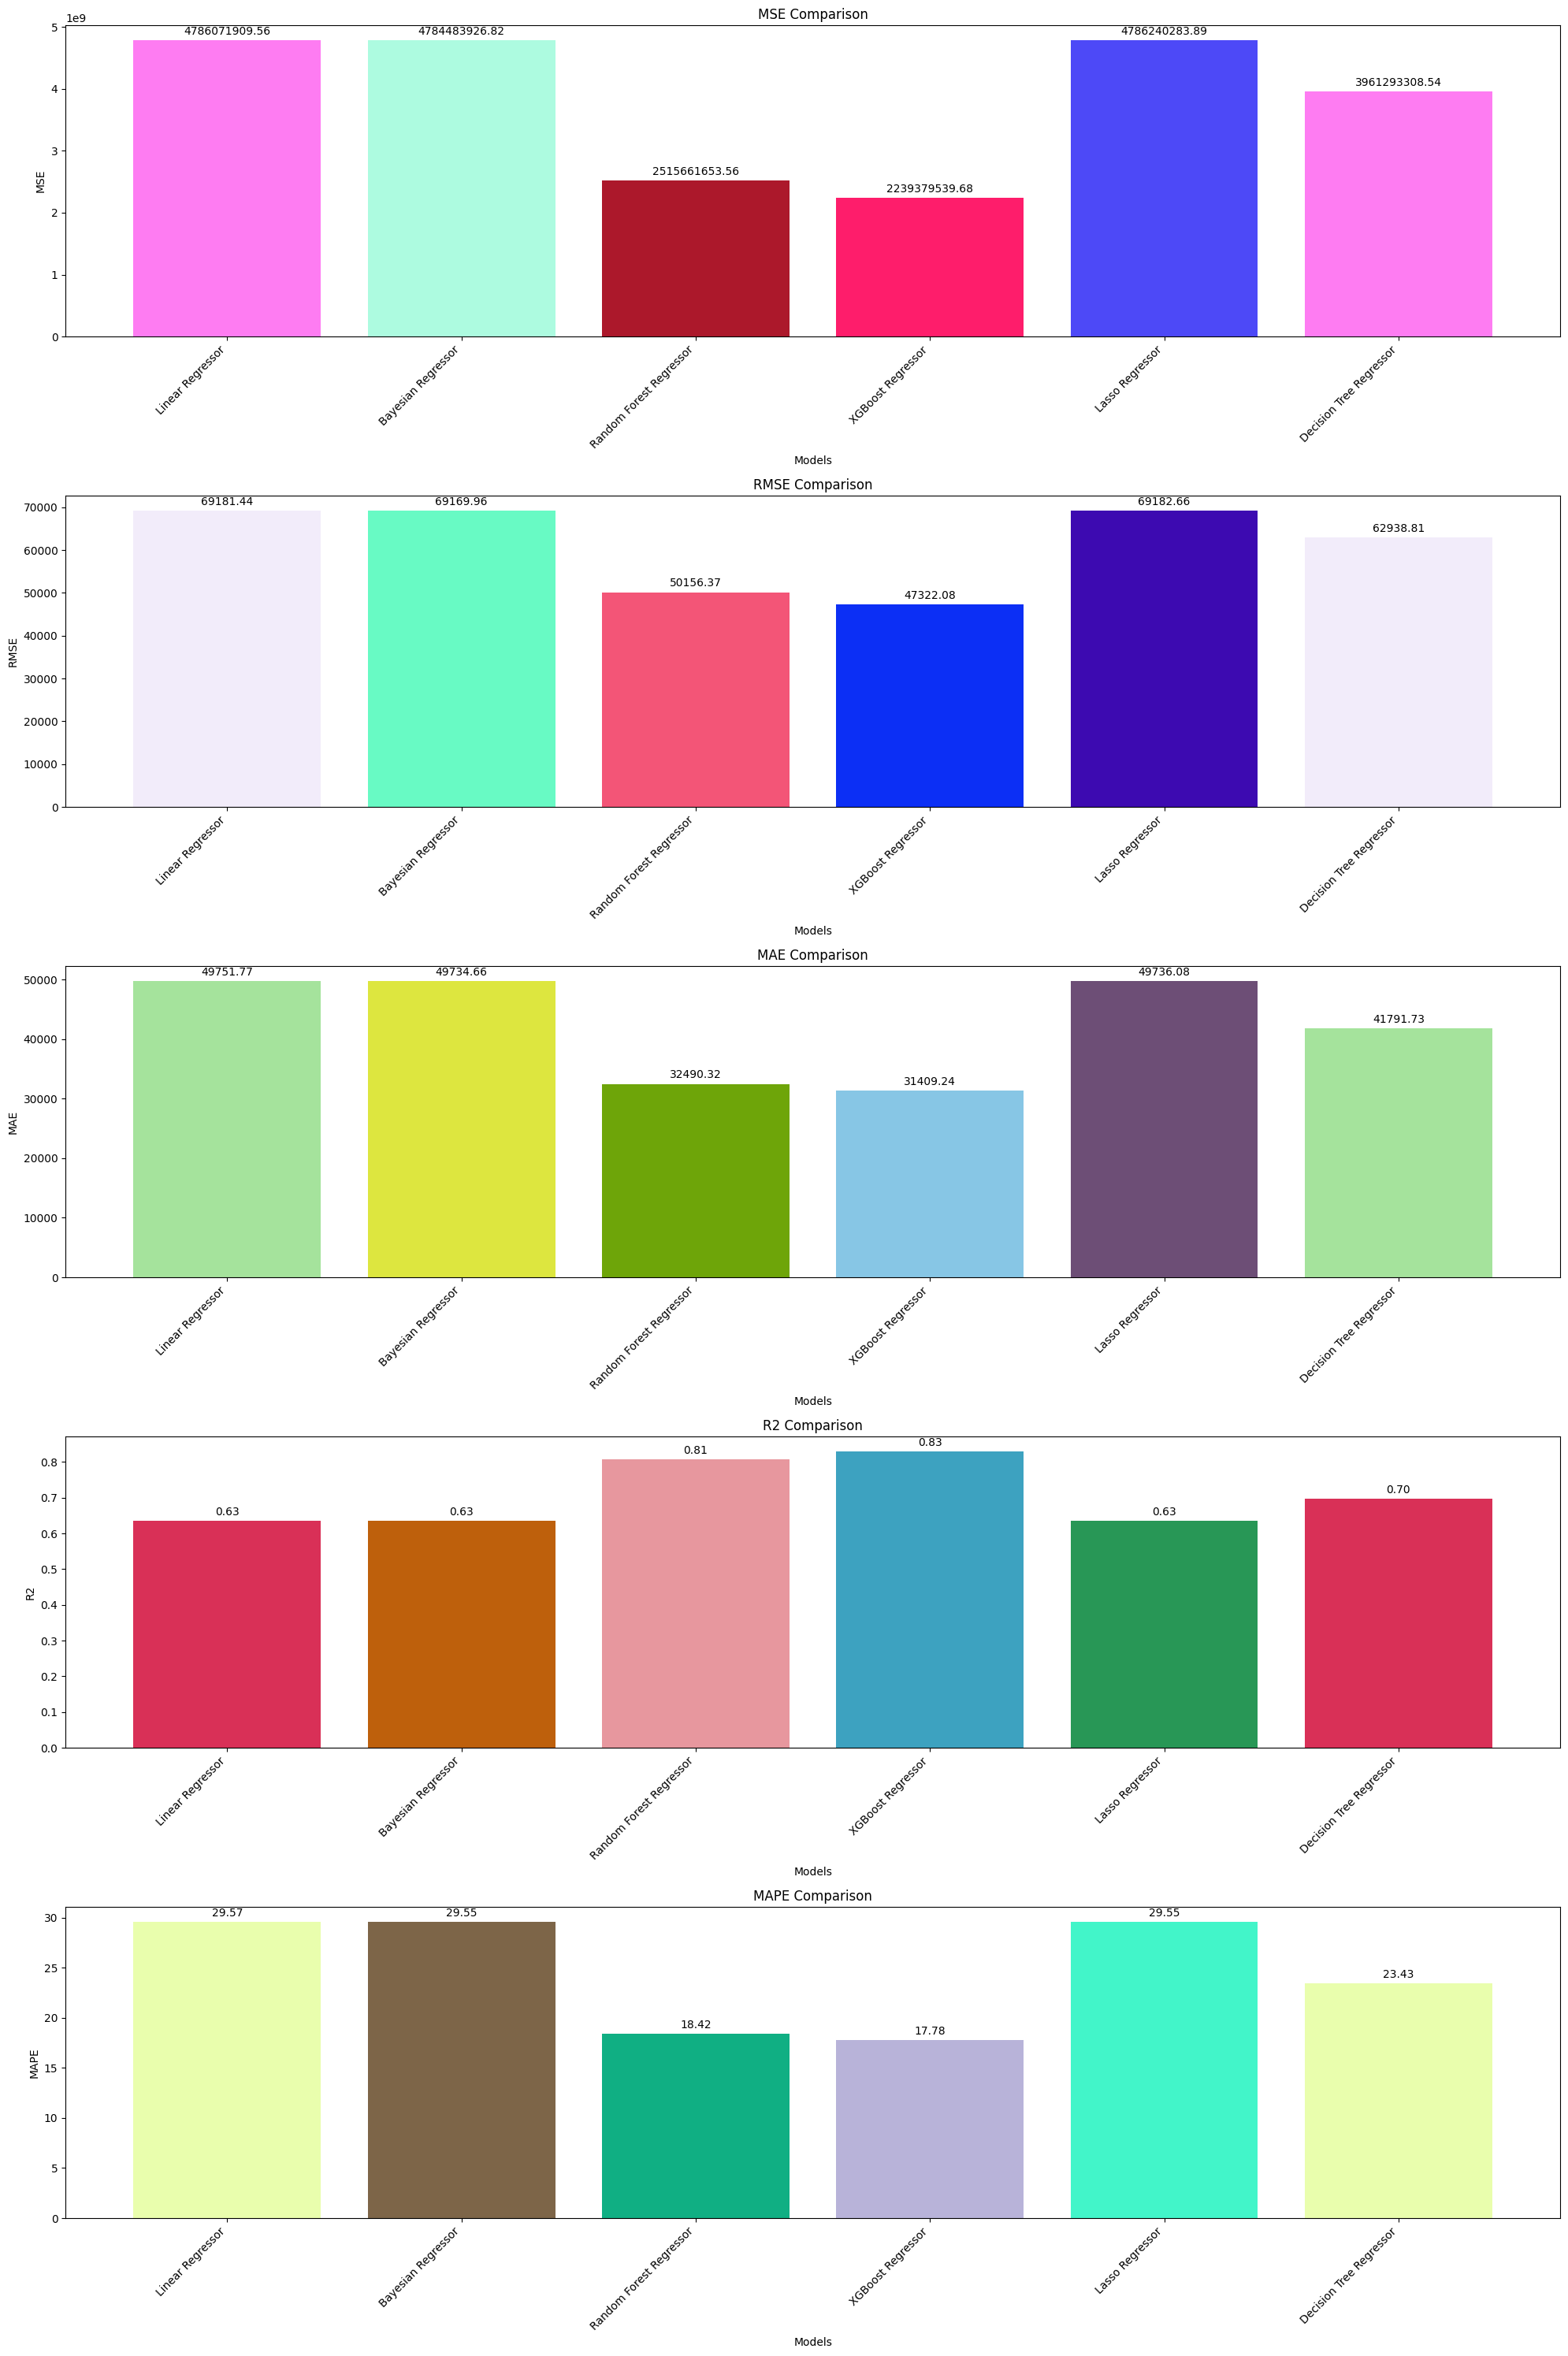

In [39]:
model_names = [result[0] for result in results]
mse_values = [result[1] for result in results]
rmse_values = [result[2] for result in results]
mae_values = [result[3] for result in results]
r2_values = [result[4] for result in results]
mape_values = [result[5] for result in results]

# Plotting bar graphs for each metric
metrics = ['MSE', 'RMSE', 'MAE', 'R2', 'MAPE']
values = [mse_values, rmse_values, mae_values, r2_values, mape_values]

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(20, 30))

for i, metric in enumerate(metrics):
    bars = axs[i].bar(model_names, values[i], color=np.random.rand(5, 3))
    axs[i].set_title(f'{metric} Comparison')
    axs[i].set_xlabel('Models')
    axs[i].set_ylabel(metric)
    axs[i].grid(False)
    axs[i].set_xticklabels(model_names, rotation=45, ha='right')
    
    for bar in bars:
        yval = bar.get_height()
        axs[i].annotate(f'{yval:.2f}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    

plt.tight_layout()
plt.show()

### 13. Summary

##### Data Preprocessing

The dataset initially contained no duplicates but had 207 missing values in the 'total_bedrooms' column, which were imputed with the mean of the column to ensure completeness and integrity of the dataset.

To address skewness in the "total_rooms", "total_bedrooms", "population", and "households" columns, a logarithmic transformation was applied. This normalization technique helps in handling skewed distributions by making the data more symmetrical and improving model performance.

The categorical variable "ocean_proximity" was transformed into numerical data through one-hot encoding. This created additional binary columns ("<1H OCEAN", "INLAND", "ISLAND", "NEAR OCEAN") representing different categories of proximity to the ocean, enhancing the model's ability to interpret this categorical feature.

##### Insights into Housing Prices

Analyzing the data revealed that inland houses are generally less expensive, whereas those within a short distance (<1 hour) from the ocean tend to command higher prices.

##### Data Splitting and Scaling

The dataset was split into 80% training data and 20% testing data to train models on a subset and evaluate their performance on unseen data. Standard scaling was applied to both the training and testing datasets to normalize the features, ensuring that each feature contributes equally to the model fitting process.

##### Feature Engineering

Two new features were introduced through feature engineering:

- **"bedrooms_ratio"**: This feature calculates the proportion of rooms in each house that are bedrooms, providing insight into the composition of living spaces.
  
- **"rooms_per_household"**: This feature calculates the average number of rooms per household, offering a metric for household size and living space.

##### Model Training and Evaluation

The dataset was trained and tested using several regression algorithms:

- **Linear Regressor**
- **Bayesian Regressor**
- **Lasso Regressor** (with hyperparameter tuning using GridSearchCV)
- **Random Forest Regressor** (with hyperparameter tuning using GridSearchCV)
- **XGBoost Regressor** (with hyperparameter tuning using GridSearchCV)
- **Decision Tree Regressor** (with hyperparameter tuning using GridSearchCV)

##### Best Performing Model

Based on the R2 score, which measures the goodness of fit of a model, the **XGBoost Regressor** with a learning rate of 0.1 and 200 estimators emerged as the top performer. This model achieved an R2 score of 0.83, indicating that approximately 83% of the variance in median house prices can be explained by the model's predictions. The XGBoost algorithm's ensemble approach and robust handling of complex relationships in data contributed to its superior performance in this predictive task.

##### Conclusion

In conclusion, the project successfully developed a predictive model for estimating median house prices in California districts. Through preprocessing, feature engineering, and model selection processes, the XGBoost Regressor demonstrated the highest accuracy in predicting housing prices. Future work could focus on exploring additional features or alternative modeling techniques to further enhance predictive accuracy and robustness.

[Back to the Table of Contents](#3.-Table-of-Contents)